In [5]:
import os
import logging
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from matplotlib import pyplot as plt


In [24]:
df = pd.read_csv("data.csv")
df.tail()

,Loan_ID,Debt_to_Income_Ratio,Loan_to_Value_Ratio,Annual_Income,Loan_Amount,Interest_Rate,Loan_Term_Years,Subordination,Collateral_Value,Sector,Region,Assigned_Credit_Rating
19995,19996,0.538519,1.027824,194243.924617,164453.883398,8.939396,0.5,4,794381.782359,Healthcare,Southern Europe,Ba3
19996,19997,0.123407,1.035169,93450.792744,190439.987433,7.645475,3.0,2,781460.366240,Finance,South Asia,Baa2
19997,19998,0.251849,0.688699,81794.726370,193942.359402,5.625843,7.0,3,677708.873223,Healthcare,Central Asia,Aa3
19998,19999,0.321660,0.804024,99251.629707,69167.963920,10.130635,0.5,2,504452.772214,Consumer Goods,East Asia,Caa2
19999,20000,0.186132,0.841197,118881.676866,473907.045511,7.550034,7.0,3,396009.400424,Retail,Oceania,Baa3


In [25]:
# Define the credit ratings as per Moody's scale
credit_ratings = ['Aaa', 'Aa1', 'Aa2', 'Aa3', 'A1', 'A2', 'A3', 
                  'Baa1', 'Baa2', 'Baa3', 'Ba1', 'Ba2', 'Ba3', 
                  'B1', 'B2', 'B3', 'Caa1', 'Caa2', 'Caa3', 'Ca', 'C']

# Ordinal encoding for Credit Rating (treated as continuous value)
ordinal_encoder = OrdinalEncoder(categories=[credit_ratings])
df['Credit_Rating_Index'] = ordinal_encoder.fit_transform(df[['Assigned_Credit_Rating']])


In [26]:
# Encode Sector and Political Stability
industry_sectors = {
    'Utilities': 6,
    'Healthcare': 5,
    'Telecommunications': 4,
    'Consumer Goods': 3,
    'Technology': 3,
    'Manufacturing': 3,
    'Finance': 2,
    'Retail': 2,
    'Agriculture': 2,
    'Transportation': 2,
    'Real Estate': 1,
    'Energy': 1
}

regions = {
    'Northern America': 6,
    'Northern Europe': 6,
    'Oceania': 5,
    'Western Europe': 5,
    'Southern Europe': 4,
    'South-East Asia': 4,
    'East Asia': 4,
    'South Asia': 3,
    'Central Asia': 3,
    'Eastern Europe': 3,
    'North Africa': 2,
    'Southern Africa': 2,
    'South America': 2,
    'Middle East': 2,
    'Central America': 1,
    'East Africa': 1,
    'West Africa': 1
}

df['Sector_Index'] = df['Sector'].map(industry_sectors)
df['Region_Index'] = df['Region'].map(regions)

In [27]:
# Define features and target
X = df.drop(columns=['Loan_ID', 'Interest_Rate', 'Assigned_Credit_Rating', 'Sector', 'Region']).values
y = df['Interest_Rate'].values
df.tail()

,Loan_ID,Debt_to_Income_Ratio,Loan_to_Value_Ratio,Annual_Income,Loan_Amount,Interest_Rate,Loan_Term_Years,Subordination,Collateral_Value,Sector,Region,Assigned_Credit_Rating,Credit_Rating_Index,Sector_Index,Region_Index
19995,19996,0.538519,1.027824,194243.924617,164453.883398,8.939396,0.5,4,794381.782359,Healthcare,Southern Europe,Ba3,12.0,5,4
19996,19997,0.123407,1.035169,93450.792744,190439.987433,7.645475,3.0,2,781460.366240,Finance,South Asia,Baa2,8.0,2,3
19997,19998,0.251849,0.688699,81794.726370,193942.359402,5.625843,7.0,3,677708.873223,Healthcare,Central Asia,Aa3,3.0,5,3
19998,19999,0.321660,0.804024,99251.629707,69167.963920,10.130635,0.5,2,504452.772214,Consumer Goods,East Asia,Caa2,17.0,3,4
19999,20000,0.186132,0.841197,118881.676866,473907.045511,7.550034,7.0,3,396009.400424,Retail,Oceania,Baa3,9.0,2,5


In [28]:
# Split the data

X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [29]:
# standardize the feature , 
# This code standardizes the training, validation, and test sets to ensure that all features have a mean of 0 and a standard deviation of 1, 
# which helps in building an effective neural network mode
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [36]:
# Build the regression model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, verbose=1)

Epoch 1/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18.3898 - mean_absolute_error: 3.0059 - val_loss: 1.5977 - val_mean_absolute_error: 0.6533
Epoch 2/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2029 - mean_absolute_error: 0.9241 - val_loss: 0.8892 - val_mean_absolute_error: 0.3653
Epoch 3/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3730 - mean_absolute_error: 0.6782 - val_loss: 0.5705 - val_mean_absolute_error: 0.1853
Epoch 4/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9870 - mean_absolute_error: 0.5520 - val_loss: 0.4195 - val_mean_absolute_error: 0.1225
Epoch 5/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7612 - mean_absolute_error: 0.4881 - val_loss: 0.3151 - val_mean_absolute_error: 0.1037
Epoch 6/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6333 - mean_absolute_error: 0.4615 - val_loss: 0.2443 - val_mean_absolute_error: 0.1118
Epoch 7/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5018 - mean_absolute_error: 0.4160 - 

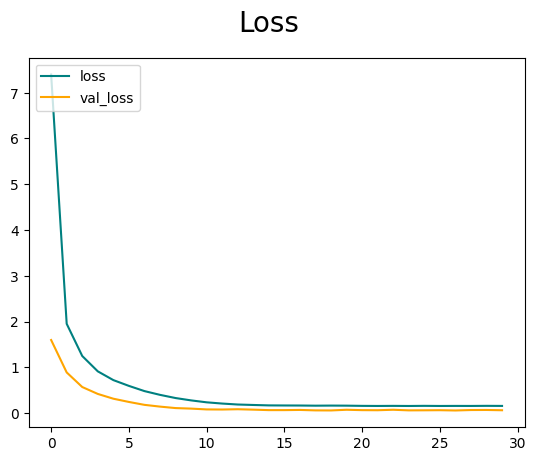

In [37]:
# Plot performance

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
# Evaluate

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")



94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.0643 - mean_absolute_error: 0.1022
Test Loss: 0.06478772312402725
Test MAE: 0.10320845246315002


In [39]:
# Predict on the test set
y_pred = model.predict(X_test)

# Display some of the predictions and actual values
predictions_df = pd.DataFrame({
    'Actual Interest Rate': y_test.flatten(),
    'Predicted Interest Rate': y_pred.flatten()
})

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [40]:
print(predictions_df.tail(30))

      Actual Interest Rate  Predicted Interest Rate
2970              9.284619                 9.304103
2971              9.723892                 9.595457
2972              8.447367                 8.416409
2973             10.517566                10.367898
2974             10.078162                 9.892985
2975              9.424272                 9.462307
2976             10.476959                10.295081
2977             11.118935                10.900519
2978             10.749502                10.609024
2979              8.865306                 8.886069
2980              5.917641                 5.974354
2981             10.045799                10.041343
2982              7.084325                 7.140265
2983             10.962313                10.758386
2984             10.399597                10.316638
2985              5.407944                 5.581563
2986             10.321836                10.263131
2987              9.835392                 9.800887
2988        

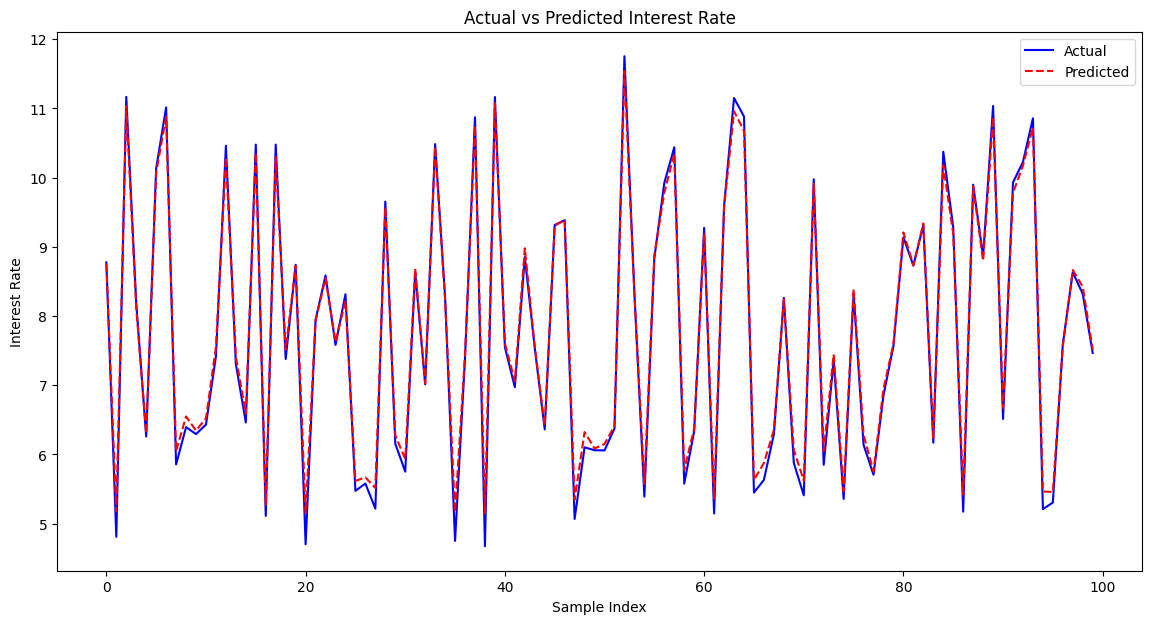

In [41]:

# Ensure that y_test_labels and y_pred_labels are in the correct shape
y_test_labels = y_test.flatten()
y_pred_labels = y_pred.flatten()

# Sample subset for better visualization (if the dataset is large)
sample_size = 100  # Adjust this value as needed
indices = np.random.choice(len(y_test_labels), sample_size, replace=False)

# Subset the data for plotting
y_test_sample = y_test_labels[indices]
y_pred_sample = y_pred_labels[indices]

plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_sample)), y_test_sample, color='blue', label='Actual')
plt.plot(range(len(y_test_sample)), y_pred_sample, color='red', linestyle='--', label='Predicted')
plt.title('Actual vs Predicted Interest Rate')
plt.xlabel('Sample Index')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()



In [5]:
# save the model
output_dir = "model"
os.makedirs(output_dir, exist_ok=True)
model.save('model/interest_rate_model.keras')

NameError: name 'model' is not defined